In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Load the dataset
df = pd.read_csv("cleaned_weather.csv")

# Show data summary
df.info()
# Show the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      52696 non-null  object 
 1   p         52696 non-null  float64
 2   T         52696 non-null  float64
 3   Tpot      52696 non-null  float64
 4   Tdew      52696 non-null  float64
 5   rh        52696 non-null  float64
 6   VPmax     52696 non-null  float64
 7   VPact     52696 non-null  float64
 8   VPdef     52696 non-null  float64
 9   sh        52696 non-null  float64
 10  H2OC      52696 non-null  float64
 11  rho       52696 non-null  float64
 12  wv        52696 non-null  float64
 13  max. wv   52696 non-null  float64
 14  wd        52696 non-null  float64
 15  rain      52696 non-null  float64
 16  raining   52696 non-null  float64
 17  SWDR      52696 non-null  float64
 18  PAR       52696 non-null  float64
 19  max. PAR  52696 non-null  float64
 20  Tlog      52696 non-null  fl

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81


In [5]:
# Convert 'date' to datetime and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Choose VPact as target variable
daily_vpact = df['VPact'].resample('D').mean()

# View a few rows
daily_vpact.head()

# Display a few rows
daily_vpact.head()


date
2020-01-01    5.066923
2020-01-02    4.513333
2020-01-03    7.114236
2020-01-04    6.485694
2020-01-05    5.682292
Freq: D, Name: VPact, dtype: float64

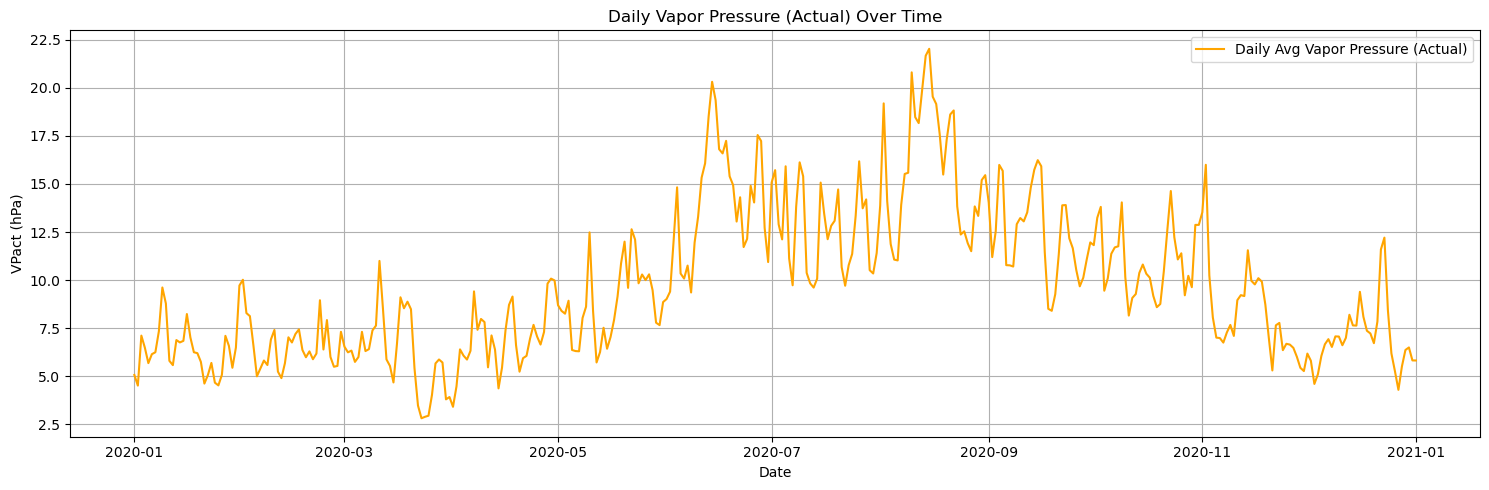

In [7]:
# Plot it
plt.figure(figsize=(15, 5))
plt.plot(daily_vpact, label='Daily Avg Vapor Pressure (Actual)', color='orange')
plt.title('Daily Vapor Pressure (Actual) Over Time')
plt.xlabel('Date')
plt.ylabel('VPact (hPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Summary statistics
df.describe()

,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,1210.882855,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,36.430222,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,1107.380000,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,1183.900000,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,1210.800000,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,1236.550000,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,1318.520000,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000


In [11]:
# Count missing values in Vapor Pressure Actual
daily_vpact.isnull().sum()

0

In [13]:
# Z-score method for outlier detection in Vapor Pressure Actual
z_scores_vpact = (daily_vpact - daily_vpact.mean()) / daily_vpact.std()
outliers_vpact = daily_vpact[abs(z_scores_vpact) > 3]

# Print number of outliers
print(f"Number of outliers in Vapor Pressure Actual: {len(outliers_vpact)}")

# Display outlier dates and values
outliers_vpact.head()

Number of outliers in Vapor Pressure Actual: 2


date
2020-08-14    21.668056
2020-08-15    22.027500
Freq: D, Name: VPact, dtype: float64

In [15]:
# Remove outliers from daily_vpact
daily_vpact_clean = daily_vpact[abs(z_scores_vpact) <= 3]

In [19]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
adf_result_vpact = adfuller(daily_vpact_clean.dropna())

print("ADF Statistic:", adf_result_vpact[0])
print("p-value:", adf_result_vpact[1])

if adf_result_vpact[1] < 0.05:
    print("The series is stationary.")
else:
    print(" The series is NOT stationary. Differencing may be needed.")

ADF Statistic: -2.15862865267258
p-value: 0.22160188028481942
 The series is NOT stationary. Differencing may be needed.


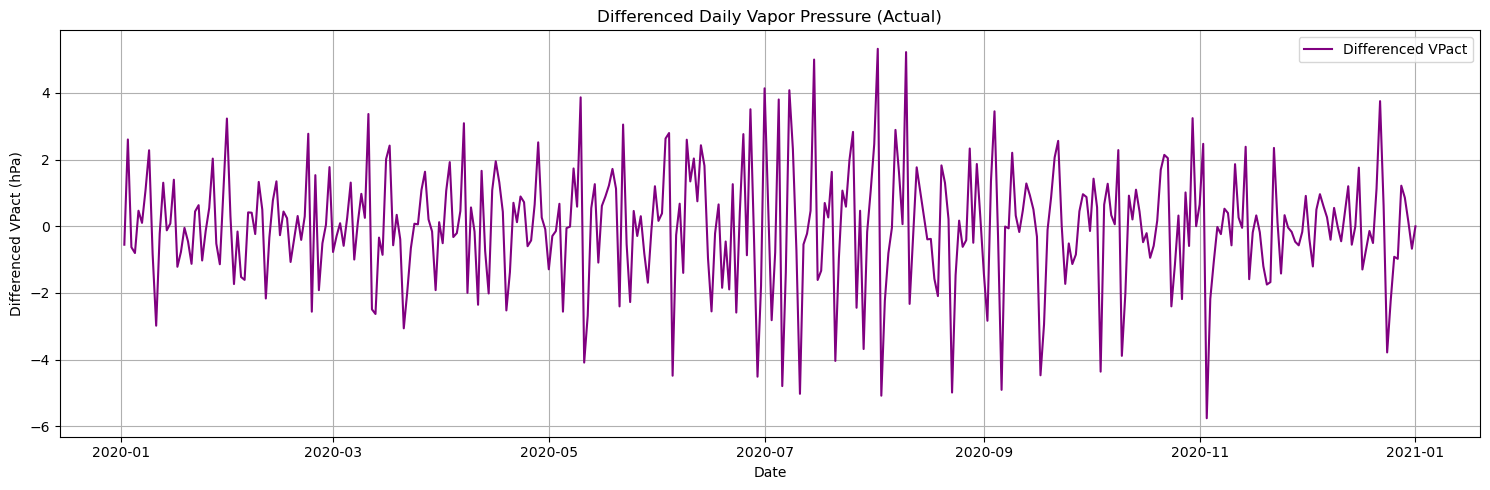

ADF Statistic (after differencing): -11.82036004560431
p-value: 8.443074447532281e-22


In [21]:
# Apply differencing
daily_vpact_diff = daily_vpact_clean.diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(15, 5))
plt.plot(daily_vpact_diff, color='purple', label='Differenced VPact')
plt.title('Differenced Daily Vapor Pressure (Actual)')
plt.xlabel('Date')
plt.ylabel('Differenced VPact (hPa)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Re-run ADF test
adf_result_diff = adfuller(daily_vpact_diff)
print("ADF Statistic (after differencing):", adf_result_diff[0])
print("p-value:", adf_result_diff[1])



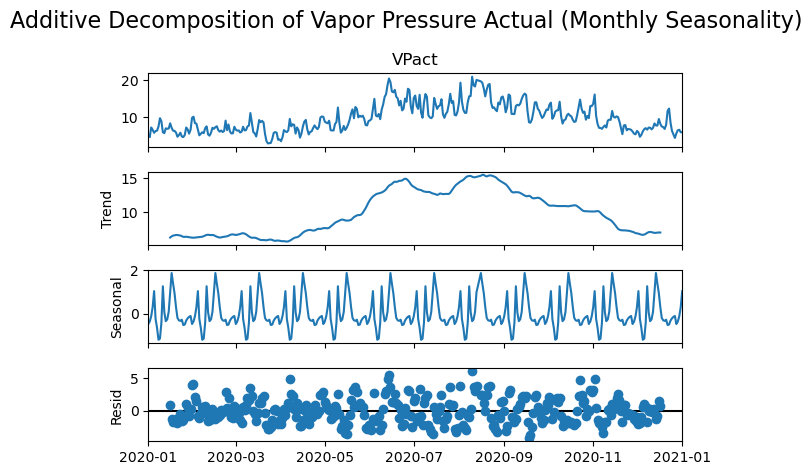

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Define seasonality period(monthly)
period = 30

# Additive decomposition
additive_decomp_vpact = seasonal_decompose(daily_vpact_clean, model='additive', period=period)
additive_decomp_vpact.plot()
plt.suptitle("Additive Decomposition of Vapor Pressure Actual (Monthly Seasonality)", fontsize=16)
plt.tight_layout()
plt.show()


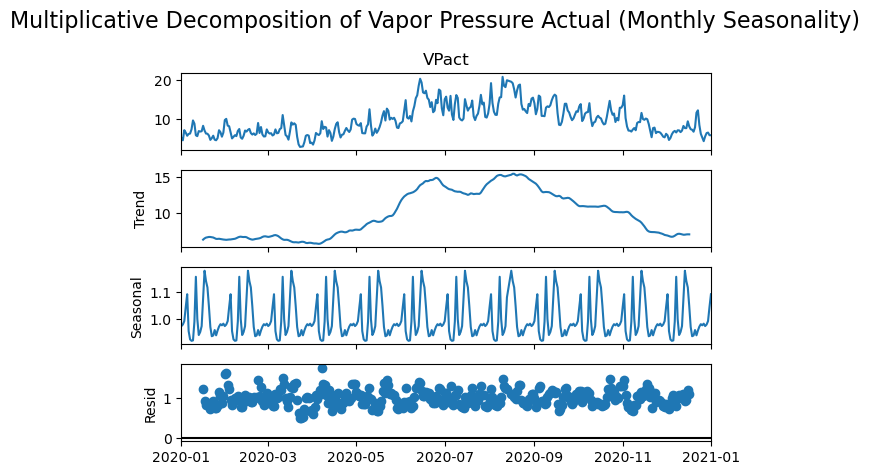

In [25]:
# Multiplicative decomposition
multiplicative_decomp = seasonal_decompose(daily_vpact_clean, model='multiplicative', period=period)
multiplicative_decomp.plot()
plt.suptitle("Multiplicative Decomposition of Vapor Pressure Actual (Monthly Seasonality)", fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Split into 80% train, 20% test
n = len(daily_vpact_clean)
train = daily_vpact_clean.iloc[:int(n * 0.8)]
test = daily_vpact_clean.iloc[int(n * 0.8):]

print(f"Train length: {len(train)}, Test length: {len(test)}")


Train length: 292, Test length: 73


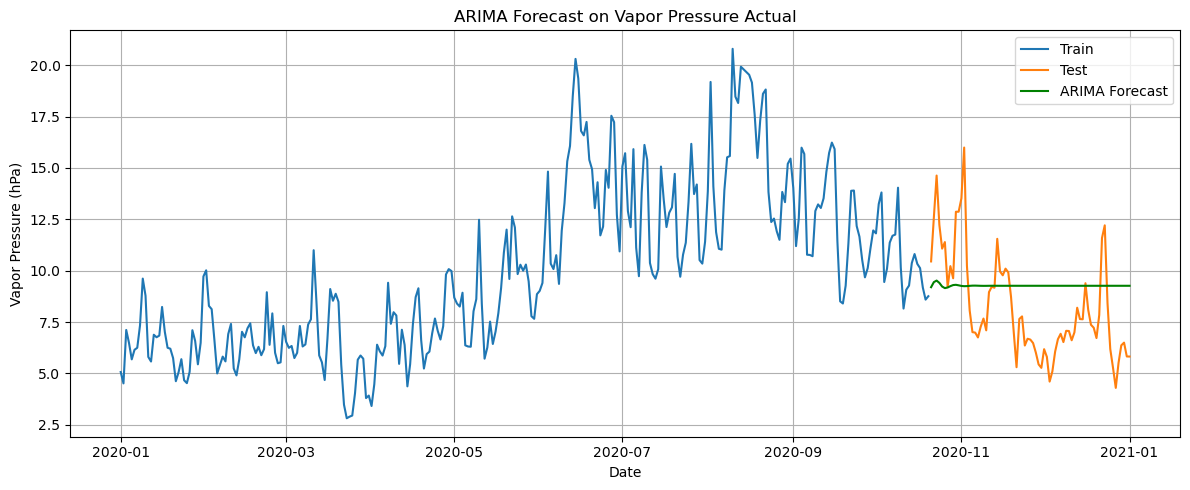

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model 
arima_model = ARIMA(train, order=(5, 1, 0)).fit()

# Forecast for test period
arima_pred = arima_model.forecast(steps=len(test))

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_pred, label='ARIMA Forecast', color='green')
plt.legend()
plt.title("ARIMA Forecast on Vapor Pressure Actual")
plt.xlabel("Date")
plt.ylabel("Vapor Pressure (hPa)")
plt.grid(True)
plt.tight_layout()
plt.show()

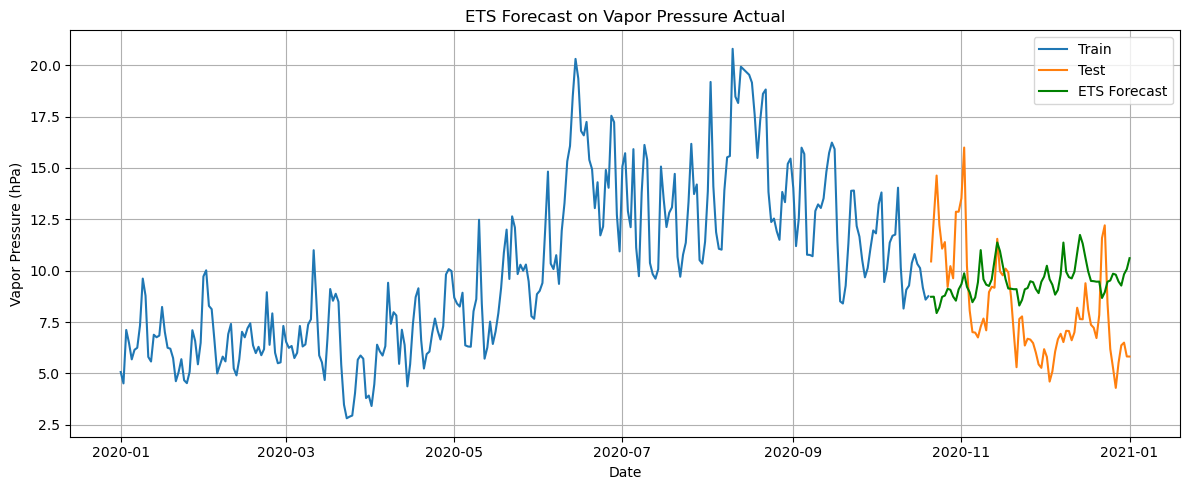

In [33]:
# ETS model with additive trend and seasonality
ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=30).fit()

# Forecast for test period
ets_pred = ets_model.forecast(len(test))

# Plot actual vs forecast
plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, ets_pred, label='ETS Forecast', color='green')
plt.legend()
plt.title("ETS Forecast on Vapor Pressure Actual")
plt.xlabel("Date")
plt.ylabel("Vapor Pressure (hPa)")
plt.grid(True)
plt.tight_layout()
plt.show()

06:54:26 - cmdstanpy - INFO - Chain [1] start processing
06:54:26 - cmdstanpy - INFO - Chain [1] done processing


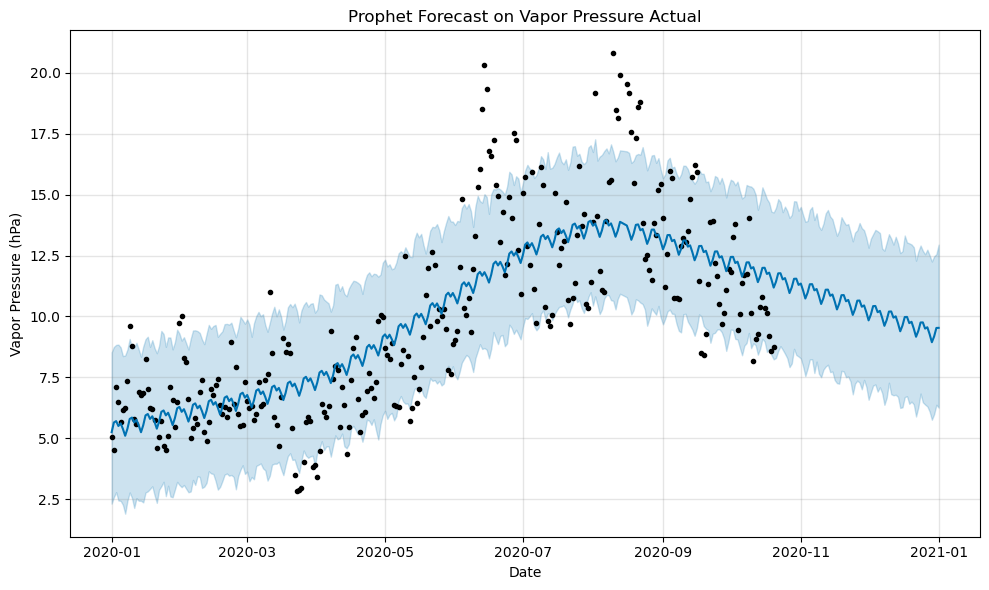

In [35]:
# Format data for Prophet
prophet_df = daily_vpact_clean.reset_index().rename(columns={'date': 'ds', 'VPact': 'y'})

# Split into train/test
prophet_train = prophet_df.iloc[:int(n * 0.8)]
prophet_test = prophet_df.iloc[int(n * 0.8):]

# Train the Prophet model
model = Prophet()
model.fit(prophet_train)

# Create future dataframe for prediction
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Prophet Forecast on Vapor Pressure Actual")
plt.xlabel("Date")
plt.ylabel("Vapor Pressure (hPa)")
plt.tight_layout()
plt.show()
# Extract only yhat values for the test period
prophet_pred = forecast[['ds', 'yhat']].set_index('ds').loc[test.index]['yhat']

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Scale the data
scaler = MinMaxScaler()
scaled_vpact = scaler.fit_transform(daily_vpact_clean.values.reshape(-1, 1))

# Step 2: Train-test split
train_lstm = scaled_vpact[:int(n * 0.8)]
test_lstm = scaled_vpact[int(n * 0.8):]

# Step 3: Create sequences
def create_seq(data, seq_len=30):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_train, y_train = create_seq(train_lstm)
X_test, y_test = create_seq(test_lstm)

# Reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [39]:
# Build the LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# Fit the model
model_lstm.fit(X_train, y_train, epochs=10, verbose=1)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2185  
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1583
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0976
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0320
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179 


In [41]:
# Predict on test set
lstm_pred_scaled = model_lstm.predict(X_test)

# Inverse transform to get back original scale
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


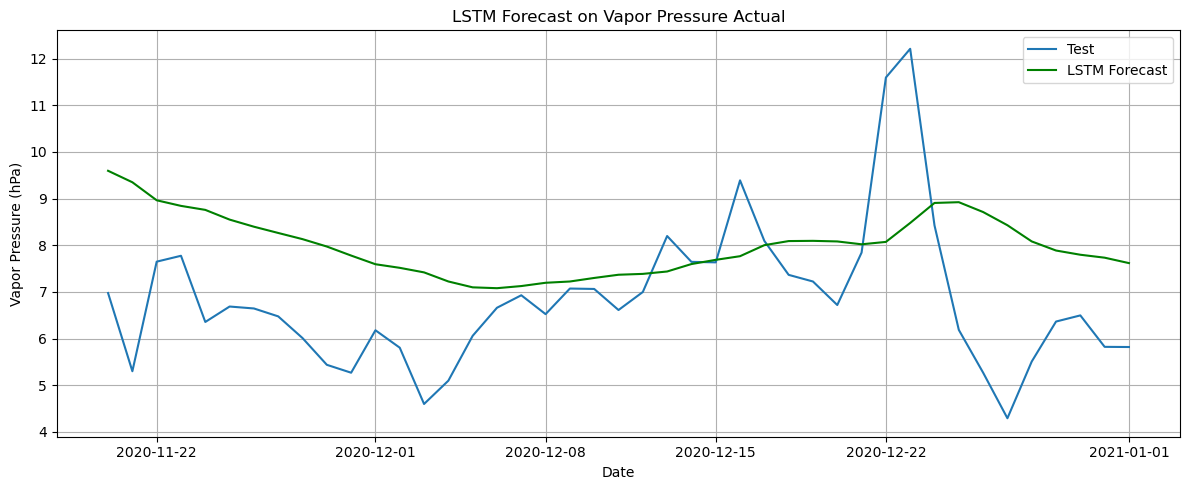

In [43]:
# Plot actual vs predicted for LSTM
plt.figure(figsize=(12, 5))
plt.plot(test.index[30:], test[30:].values, label='Test')
plt.plot(test.index[30:], lstm_pred, label='LSTM Forecast', color='green')
plt.title("LSTM Forecast on Vapor Pressure Actual")
plt.xlabel("Date")
plt.ylabel("Vapor Pressure (hPa)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:

# Define evaluation function for each model
def model_metrics(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE (%)": mean_absolute_percentage_error(y_true, y_pred) * 100
    }

# Collect metrics
metrics = {
    "ARIMA": model_metrics(test, arima_pred),
    "ETS": model_metrics(test, ets_pred),
    "Prophet": model_metrics(test.values, prophet_pred),
    "LSTM": model_metrics(test[30:].values, lstm_pred)
}

# Convert to DataFrame
results_df = pd.DataFrame(metrics).T  
results_df = results_df.round(3)      
results_df.index.name = "Model"

# Display the table
print(" Model Comparison Table:")
display(results_df)


 Model Comparison Table:


,MSE,RMSE,MAE,MAPE (%)
Model,,,,
ARIMA,7.319,2.705,2.354,32.866
ETS,9.398,3.066,2.680,37.190
Prophet,9.715,3.117,2.769,40.657
LSTM,3.851,1.962,1.600,25.773


In [47]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

st.title("⛅ Vapor Pressure Forecasting App")

# File upload: expects a CSV file with columns "date" and "VPact"
uploaded_file = st.file_uploader("📁 Upload your CSV file", type="csv")

if uploaded_file is not None:
    # Read CSV and prepare the time series
    df = pd.read_csv(uploaded_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    ts = df['VPact'].dropna()
    
    st.write("### Raw Time Series")
    st.line_chart(ts)
    
    # Time Series Decomposition Section
    st.subheader("Time Series Decomposition")
    decomposition_type = st.selectbox("Decomposition Type", ["Additive", "Multiplicative"])
    period = st.slider("Seasonality Period (days)", 7, 60, 30)
    
    # Check for multiplicative conditions
    if decomposition_type.lower() == "multiplicative" and (ts <= 0).any():
        st.error("Multiplicative decomposition cannot be performed on non-positive values.")
    else:
        decomp = seasonal_decompose(ts, model=decomposition_type.lower(), period=period)
        fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
        decomp.observed.plot(ax=ax[0], title='Observed')
        decomp.trend.plot(ax=ax[1], title='Trend')
        decomp.seasonal.plot(ax=ax[2], title='Seasonal')
        decomp.resid.plot(ax=ax[3], title='Residual')
        plt.tight_layout()
        st.pyplot(fig)
    
    # Forecasting Section
    st.subheader("Forecasting")
    model_choice = st.selectbox("Forecasting Model", ["ARIMA", "ETS", "Prophet"])
    forecast_steps = st.slider("Forecast Horizon (days)", 10, 90, 30)
    
    # Split data into training and testing sets
    train = ts[:-forecast_steps]
    test = ts[-forecast_steps:]
    
    if model_choice == "ARIMA":
        model_fit = ARIMA(train, order=(5, 1, 0)).fit()
        forecast = model_fit.forecast(steps=forecast_steps)
    elif model_choice == "ETS":
        model_fit = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=period).fit()
        forecast = model_fit.forecast(steps=forecast_steps)
    else:  # Prophet
        df_prophet = df.reset_index()[['date', 'VPact']].rename(columns={'date': 'ds', 'VPact': 'y'})
        m = Prophet()
        m.fit(df_prophet[:-forecast_steps])
        future = m.make_future_dataframe(periods=forecast_steps)
        forecast_df = m.predict(future)
        forecast = forecast_df['yhat'].iloc[-forecast_steps:].values
        st.write("### Prophet Forecast Plot")
        fig_prophet = m.plot(forecast_df)
        st.pyplot(fig_prophet)
    
    # Evaluation Metrics
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mape = mean_absolute_percentage_error(test, forecast)
    
    st.write("### Evaluation Metrics")
    st.write(f"**MAE:** {mae:.2f}")
    st.write(f"**RMSE:** {rmse:.2f}")
    st.write(f"**MAPE:** {mape:.2%}")
    
    # Plot forecast vs actual
    st.write("### Forecast vs Actual")
    forecast_series = pd.Series(forecast, index=test.index)
    fig_final, ax_final = plt.subplots(figsize=(10, 5))
    train.plot(ax=ax_final, label="Train")
    test.plot(ax=ax_final, label="Test")
    forecast_series.plot(ax=ax_final, label="Forecast")
    ax_final.legend()
    ax_final.set_ylabel("Vapor Pressure (hPa)")
    st.pyplot(fig_final)


2025-04-13 06:56:45.163 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
